## Análisis por Tamizado

#### Problema:
A continuación se muestran los resultados de un análisis de tamiz:
1. Determine el porcentaje de finos en cada tamiz y grafique la curva de distribución de
tamaño de grano.
2. Determine $D_{10}, D_{30} y D_{60}$ para curva de distribución de tamaño de grano.
3. Calcule el coeficiente de uniformidad, $C_u$.
4. Calcule el coeficiente de gradación, $C_c$.

In [26]:
# importamos las librerias necesarias
using DataFrames
using Plots
using PlotThemes
using PrettyTables
include("librerias/tamiz.jl")
include("librerias/diametros_r.jl");

In [31]:
tam_n = [4, 10, 20, 40, 60, 100, 200,"pan"];
tam_a = [malla_mm(x) for x in tam_n] 


masa_ret = [0, 21.6, 49.5, 102.6, 89.1, 95.6, 60.4, 31.2];
Df = DataFrame("Tamiz N°" => tam_n,"Tamiz (mm)" => tam_a, "Masa Retenida (gr)" => masa_ret);
pretty_table(Df, nosubheader=true, header_crayon = crayon"yellow")

┌──────────┬────────────┬────────────────────┐
│ Tamiz N° │ Tamiz (mm) │ Masa Retenida (gr) │
├──────────┼────────────┼────────────────────┤
│        4 │       4.75 │                0.0 │
│       10 │        2.0 │               21.6 │
│       20 │       0.85 │               49.5 │
│       40 │      0.425 │              102.6 │
│       60 │       0.25 │               89.1 │
│      100 │       0.15 │               95.6 │
│      200 │      0.075 │               60.4 │
│      pan │            │               31.2 │
└──────────┴────────────┴────────────────────┘


#### Solucion:
Calculos:

In [32]:
S=sum(masa_ret); 
fondo = pop!(masa_ret);

In [33]:
Pa = cumsum(masa_ret*100/S); # Porcentajes acumulados
Pd = [100-x for x in Pa]; # 100 - Porcentajes acumulados 

Cuadro de Resultados:

In [34]:
Df = DataFrame("Tamiz N°" => tam_n,"Tamiz (mm)" => tam_a, "Masa Retenida (gr)" => push!(masa_ret,fondo),"%Acumulado"=>push!(Pa,0),"100 - % Acumulado" =>push!(Pd,0))
pretty_table(Df, nosubheader=true, header_crayon = crayon"yellow")

┌──────────┬────────────┬────────────────────┬────────────┬───────────────────┐
│ Tamiz N° │ Tamiz (mm) │ Masa Retenida (gr) │ %Acumulado │ 100 - % Acumulado │
├──────────┼────────────┼────────────────────┼────────────┼───────────────────┤
│        4 │       4.75 │                0.0 │        0.0 │             100.0 │
│       10 │        2.0 │               21.6 │        4.8 │              95.2 │
│       20 │       0.85 │               49.5 │       15.8 │              84.2 │
│       40 │      0.425 │              102.6 │       38.6 │              61.4 │
│       60 │       0.25 │               89.1 │       58.4 │              41.6 │
│      100 │       0.15 │               95.6 │    79.6444 │           20.3556 │
│      200 │      0.075 │               60.4 │    93.0667 │           6.93333 │
│      pan │            │               31.2 │        0.0 │               0.0 │
└──────────┴────────────┴────────────────────┴────────────┴───────────────────┘


Curva de distribución de tamaño de partícula:

In [35]:
pop!(Pd);
pop!(tam_a);

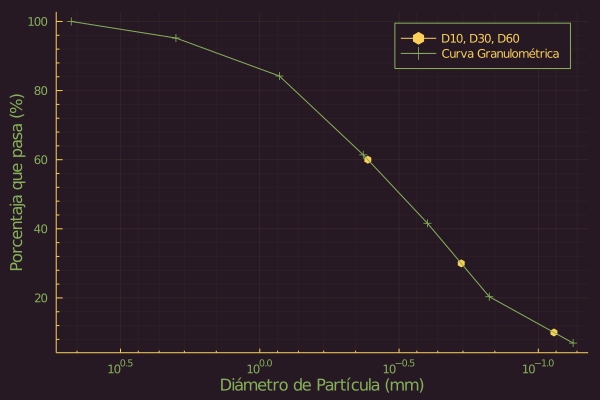

In [36]:
theme(:orange)
plot([inter_mul(Pd,tam_a,10),inter_mul(Pd,tam_a,30),inter_mul(Pd,tam_a,60),NaN],[10, 30, 60,NaN],lw=0,markesize=8,markershape=:hexagon,label="D10, D30, D60")
plot!(tam_a, Pd, xflip = true, xscale = :log10, minorgrid = true,markesize=1,markershape=:cross,label="Curva Granulométrica")
plot!(xlabel="Diámetro de Partícula (mm)", ylabel = "Porcentaja que pasa (%)")


Del gráfico:

In [37]:
D10 = inter_mul(Pd,tam_a,10)
D30 = inter_mul(Pd,tam_a,30)
D60 = inter_mul(Pd,tam_a,60)
println("D10: $(D10) mm\nD30: $(D30) mm\nD60: $(D60) mm")

D10: 0.0879 mm
D30: 0.1891 mm
D60: 0.4093 mm


Coeficientes:

In [38]:
Cu = D60 / D10
Cc = D30^2 / (D60 * D10)
println("Cu: $(round(Cu,digits = 3))\nCc: $(round(Cc,digits = 3))")

Cu: 4.656
Cc: 0.994
